In [122]:
!pip install numpy matplotlib tqdm pillow

In [123]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

In [124]:
def plot_net(t, r, I, W):
    # Calculate eigenvalues of the weight matrix
    lam = np.linalg.eigvals(W)

    # Plotting
    plt.figure(figsize=(12, 8))

    plt.subplot(3, 1, 1)
    plt.plot(t, r.T)
    plt.xlabel('Time (a.u.)')
    plt.ylabel('Activity')

    plt.subplot(3, 1, 2)
    plt.plot(t, I)
    plt.xlabel('Time (a.u.)')
    plt.ylabel('Input')
    plt.ylim([0, 1.5])

    plt.subplot(3, 1, 3)
    plt.plot(sorted(np.abs(lam), reverse=True), '.')
    plt.ylim([0, 1.5])
    plt.xlabel('Eigenvalue #')
    plt.ylabel('Eigenvalue Magnitude |λ|')

    plt.tight_layout()
    plt.show()

# Short term mem

Fill in below:

In [101]:
class SimpleNetwork():
    def __init__(self, N, W, V, tau):
        # Create weights from stimulus to neural population
        self.N = N  # number of neurons
        self.V = V  # input weights
        self.W = W  # recurrent weights
        self.tau = tau  # time constant

    def simulate_network(self, I, S, dt=0.1):
        # Initialize neuron activities
        r = np.zeros((self.N, S))

        # Simulate network dynamics
        for s in range(S - 1):
            r[:, s + 1] = r[:, s] + (dt / self.tau) * (-r[:, s] + self.W @ r[:, s] + self.V * I[s])

        return r

Simulate the net with a step input and no recurrent weights. What does tau do?

In [102]:
# Simulation parameters
N = 50  # Number of neurons in network
dt = 0.1  # Discretization timestep
tau = 0.4  # Time constant
T = 10  # Max time
S = int(np.ceil(T / dt))  # Number of simulation steps
t = np.arange(0, T, dt)  # Time array

# Create input stimulus
I = np.zeros(S)
I[(t > 1) & (t < 2)] = 1  # Input stimulus between time 1 and 2


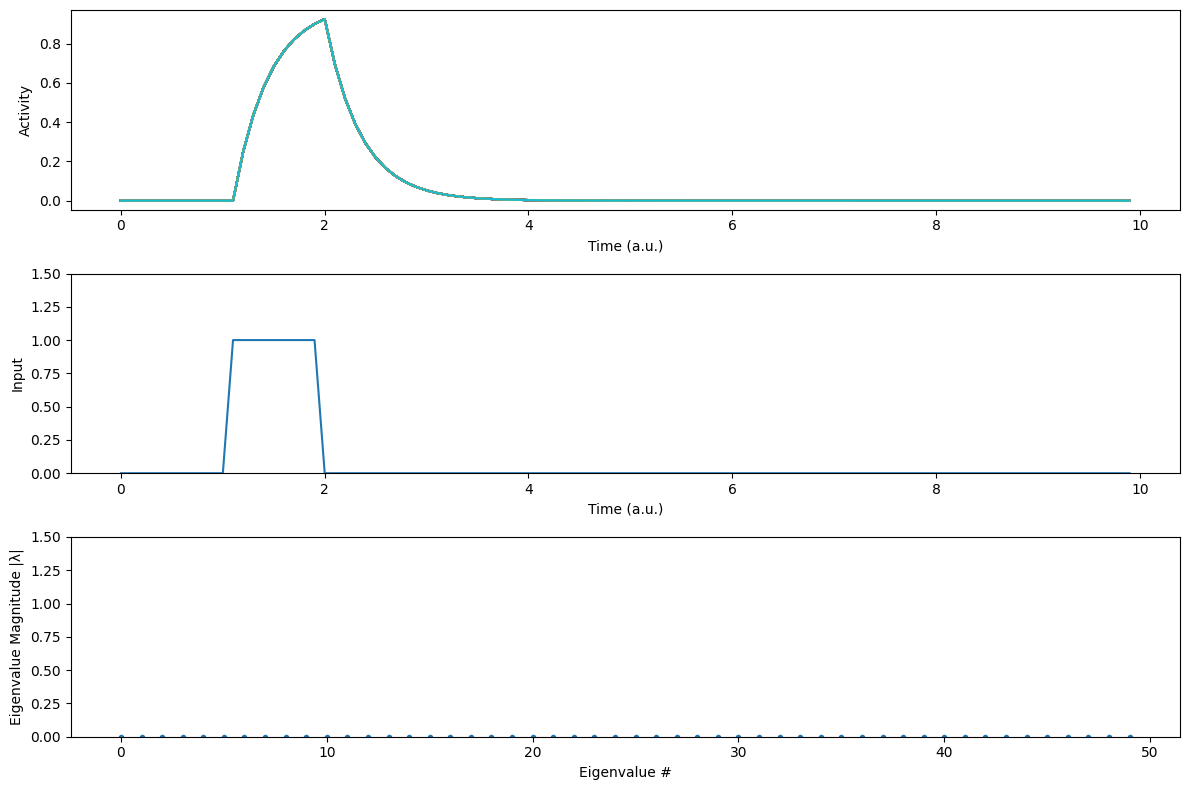

In [103]:
# Initialize the network
W = np.zeros((N, N))  # Weight matrix with no recurrent connections

# Create network object
net = SimpleNetwork(N, W, 1, tau)
r = net.simulate_network(I, S, dt)

plot_net(t, r, I, W)

Simulate the network with autapses. How does behaviour vary with the weight scale?

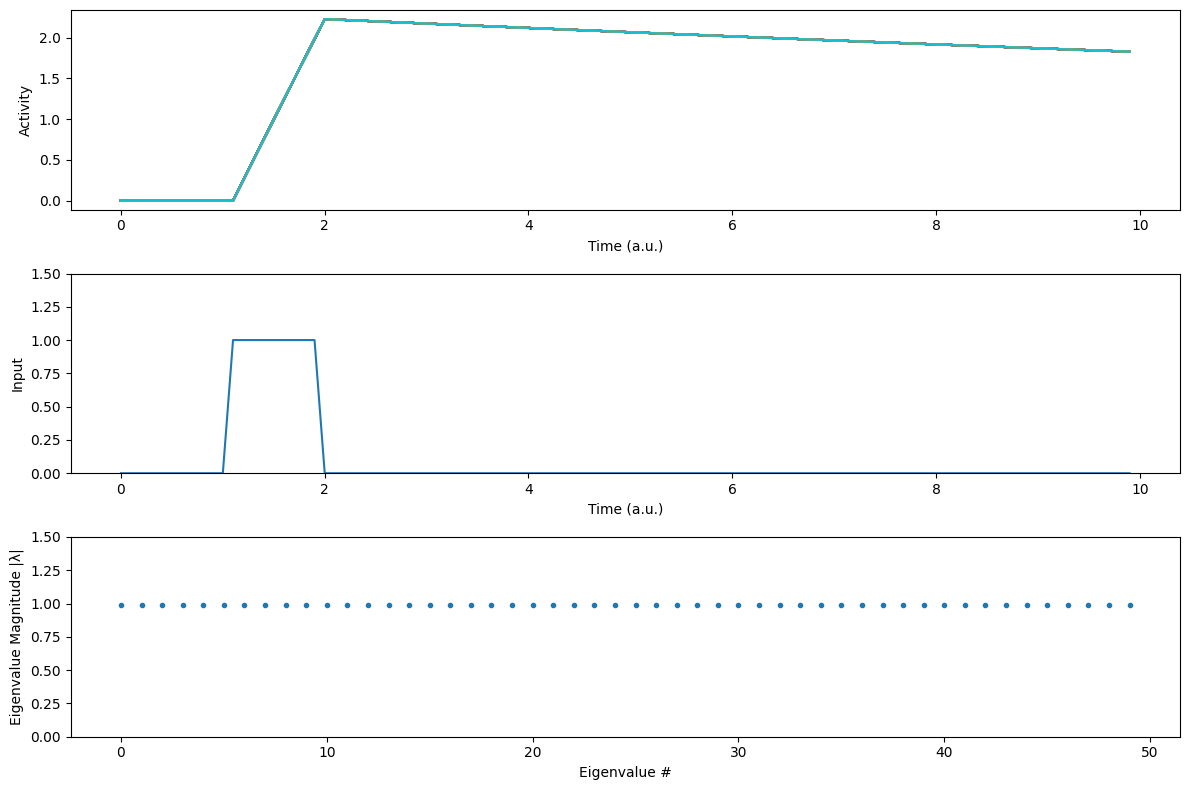

In [104]:
weight_scale = 0.99
W = weight_scale * np.eye(N)  # Autapses

# Create network object
net = SimpleNetwork(N, W, 1, tau)
r = net.simulate_network(I, S, dt)

plot_net(t, r, I, W)


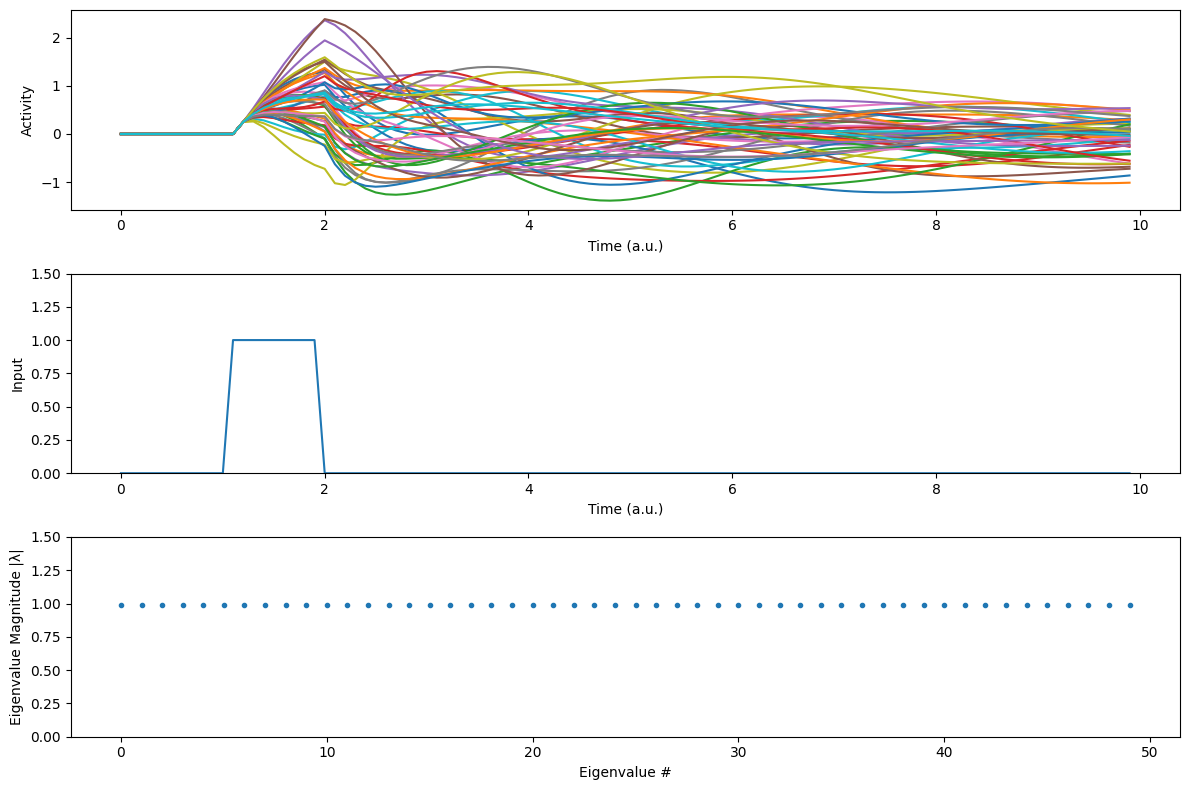

In [98]:
U, _, _ = np.linalg.svd(np.random.randn(N, N))  # Random orthonormal connections
W = weight_scale * U

# Create network object
net = SimpleNetwork(N, W, 1, tau)
r = net.simulate_network(I, S, dt)

plot_net(t, r, I, W)

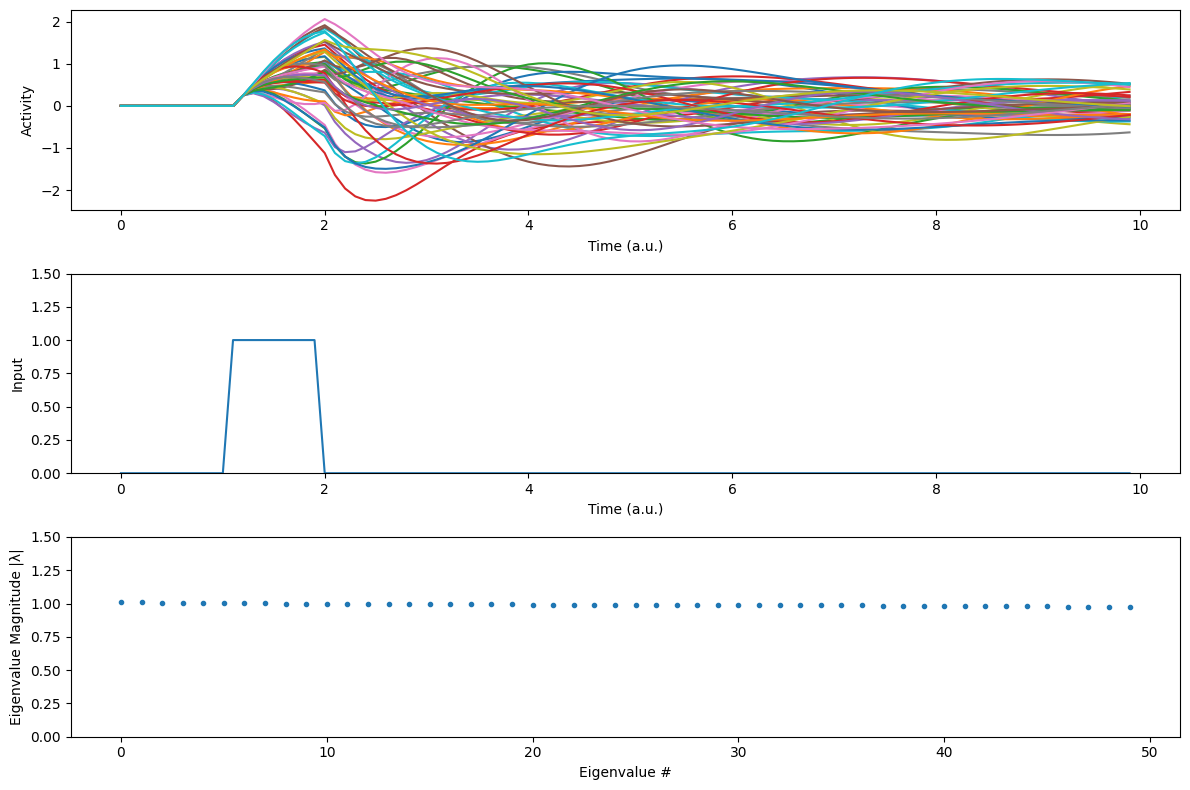

In [109]:
U, _, _ = np.linalg.svd(np.random.randn(N, N))  # Random orthonormal connections
W = weight_scale * U

noise_scale = 0.1
W += noise_scale / np.sqrt(N) * np.random.randn(N, N)  # Add noise to the weight matrix

# Create network object
net = SimpleNetwork(N, W, 1, tau)
r = net.simulate_network(I, S, dt)

plot_net(t, r, I, W)

# Long term mem

In [134]:
from PIL import Image, ImageDraw, ImageFont
from tqdm import tqdm

# Define the string2im function
def string2im(str1, str2, Nx=1000, Ny=80):
    img = Image.new('L', (Nx, Ny), 255)
    draw = ImageDraw.Draw(img)
    font = ImageFont.load_default()  # Use a default font
    draw.text((5, 0), str1, fill=0, font=font)
    # q: what do 10 and 65 do?
    # a:
    draw.text((5, 10), str2, fill=0, font=font)
    img_array = np.array(img) < 128
    return img_array.astype(np.double).flatten()

# Define plot function
def plot_mem(pattern, Nx, Ny):
    plt.imshow(pattern.reshape(Ny, Nx), cmap='gray')
    plt.axis('off')


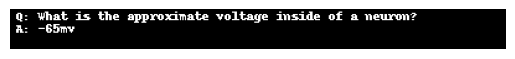

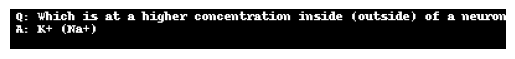

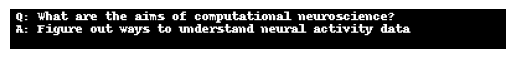

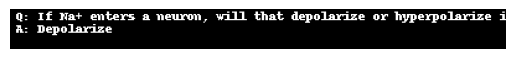

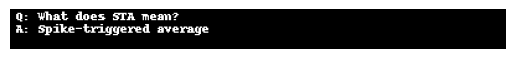

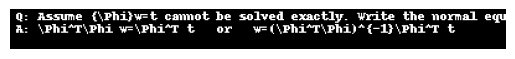

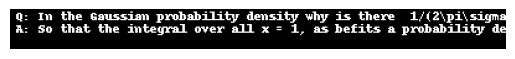

In [152]:
# Define questions and answers
questions = [
             'What is the approximate voltage inside of a neuron?',
             'Which is at a higher concentration inside (outside) of a neuron?',
             'What are the aims of computational neuroscience?',
             'If Na+ enters a neuron, will that depolarize or hyperpolarize it?',
             'What does STA mean?',
             'Assume {\Phi}w=t cannot be solved exactly. Write the normal equations.',
             'In the Gaussian probability density why is there  1/(2\pi\sigma^2)^{1/2}?'
]

answers = [
           '-65mv',
           'K+ (Na+)',
           'Figure out ways to understand neural activity data',
           'Depolarize',
           'Spike-triggered average',
           '\Phi^T\Phi w=\Phi^T t   or   w=(\Phi^T\Phi)^{-1}\Phi^T t',
           'So that the integral over all x = 1, as befits a probability density'
]

# Image dimensions
Ny, Nx = 32, 400
N = Ny * Nx
P = len(questions)

# Create binary images for each question-answer pair
xi = np.zeros((N, P))
for i in range(P):
    xi[:, i] = string2im(f"Q: {questions[i]}", f"A: {answers[i]}", Nx, Ny)
    plt.figure()
    plot_mem(xi[:, i], Nx, Ny)

In [166]:
# Define the Hopfield Network class
class HopfieldNetwork:
    def __init__(self, size):
        self.size = size
        self.weights = np.zeros((size, size), dtype=np.double)
        self.max_train_iter = 1000

    def train(self, patterns, eta=0.0001):
        err = 1
        for i in tqdm(range(self.max_train_iter)):
            n = self.weights @ patterns  # post synaptic activity
            kappa = 0.5
            omega = (n - 0.5) * (2 * (patterns - 0.5)) - kappa < 0
            err = np.sum(omega)
            self.weights += eta * (omega * (2 * (patterns - 0.5))) @ patterns.T
            if err == 0:
                return True
        
        return False

    def update(self, pattern):
        return (self.weights @ pattern - 0.5) > 0

In [142]:
# Instantiate and train Hopfield network
hopfield_net = HopfieldNetwork(N)
completed = hopfield_net.train(xi)

print(f'Training completed? {completed}')

  0%|          | 0/1000 [00:00<?, ?it/s]

  2%|▏         | 19/1000 [00:09<08:24,  1.94it/s]

Training completed? True


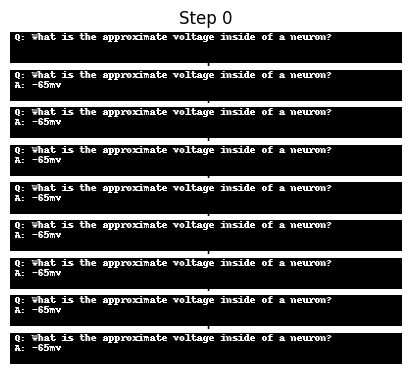

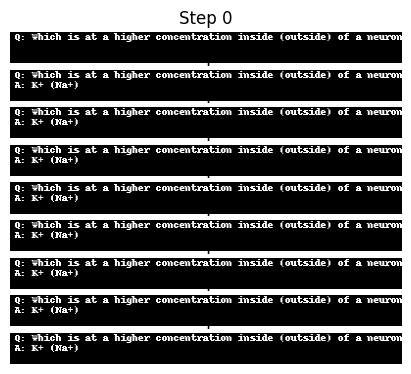

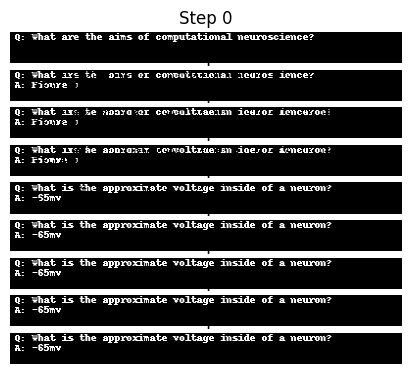

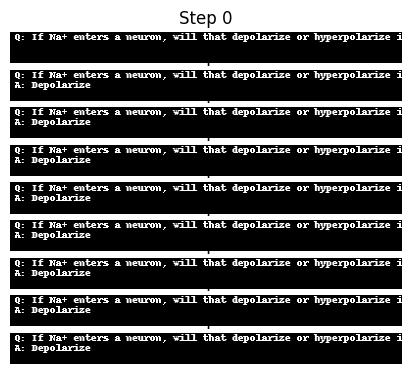

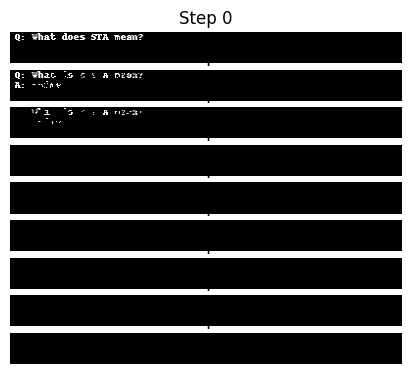

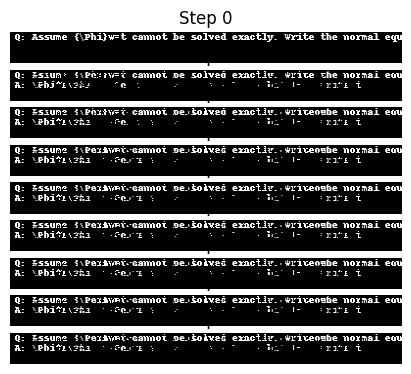

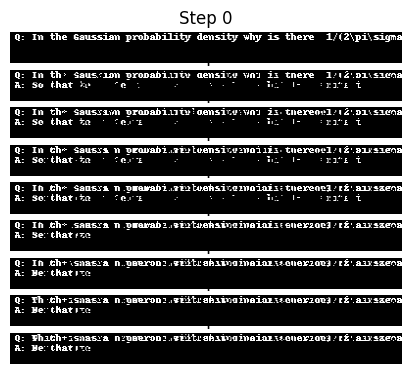

In [71]:
# Simulate network response
for question_num in range(P):
    question_img = string2im(f"Q: {questions[question_num]}", " ", Nx, Ny)
    h = np.zeros((N, 10))
    h[:, 0] = question_img
    
    plt.figure()
    for t in range(0, 9):
        h[:, t+1] = hopfield_net.update(h[:, t])
        plt.subplot(10, 1, t+1)
        plot_mem(h[:, t], Nx, Ny)
        plt.title(f"Step {t}")

    plt.show()

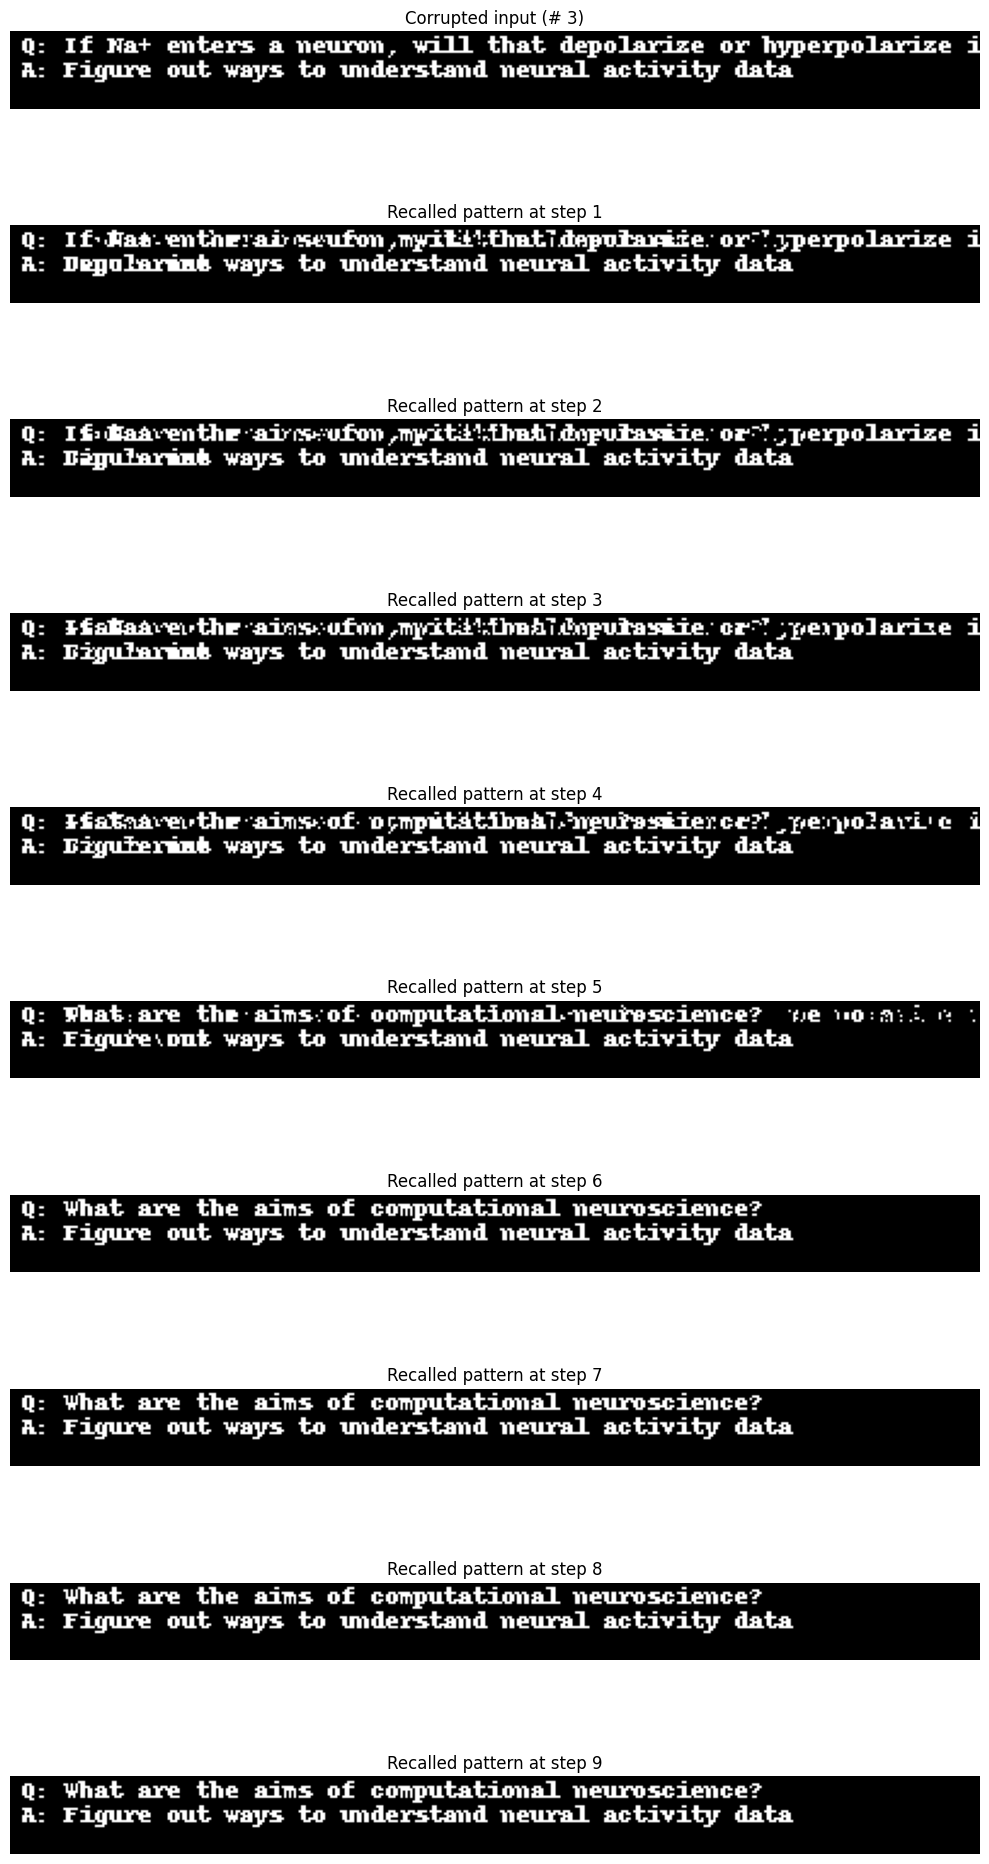

In [75]:
# Initialize the Hopfield network and train it with the patterns
hopfield_net = HopfieldNetwork(N)
hopfield_net.train(xi)

# Look at one question in more detail
question_num = 3
question = questions[question_num]
partial_answer = 'Figure out ways'
xi0 = string2im(f"Q: {question}", f"A: {partial_answer}", Nx, Ny)

# Simulate the network for T steps
T = 10
h = np.zeros((N, T))
h[:, 0] = xi0

# Plotting the initial state and subsequent updates
plt.figure(figsize=(10, 20))
plt.subplot(T, 1, 1)
plot_mem(h[:, 0], Nx, Ny)
plt.title(f'Corrupted input (# {question_num})')

for t in range(1, T):
    h[:, t] = hopfield_net.update(h[:, t-1])
    plt.subplot(T, 1, t+1)
    plot_mem(h[:, t], Nx, Ny)
    plt.title(f'Recalled pattern at step {t}')

plt.tight_layout()
plt.show()


IndexError: index 20 is out of bounds for axis 1 with size 20

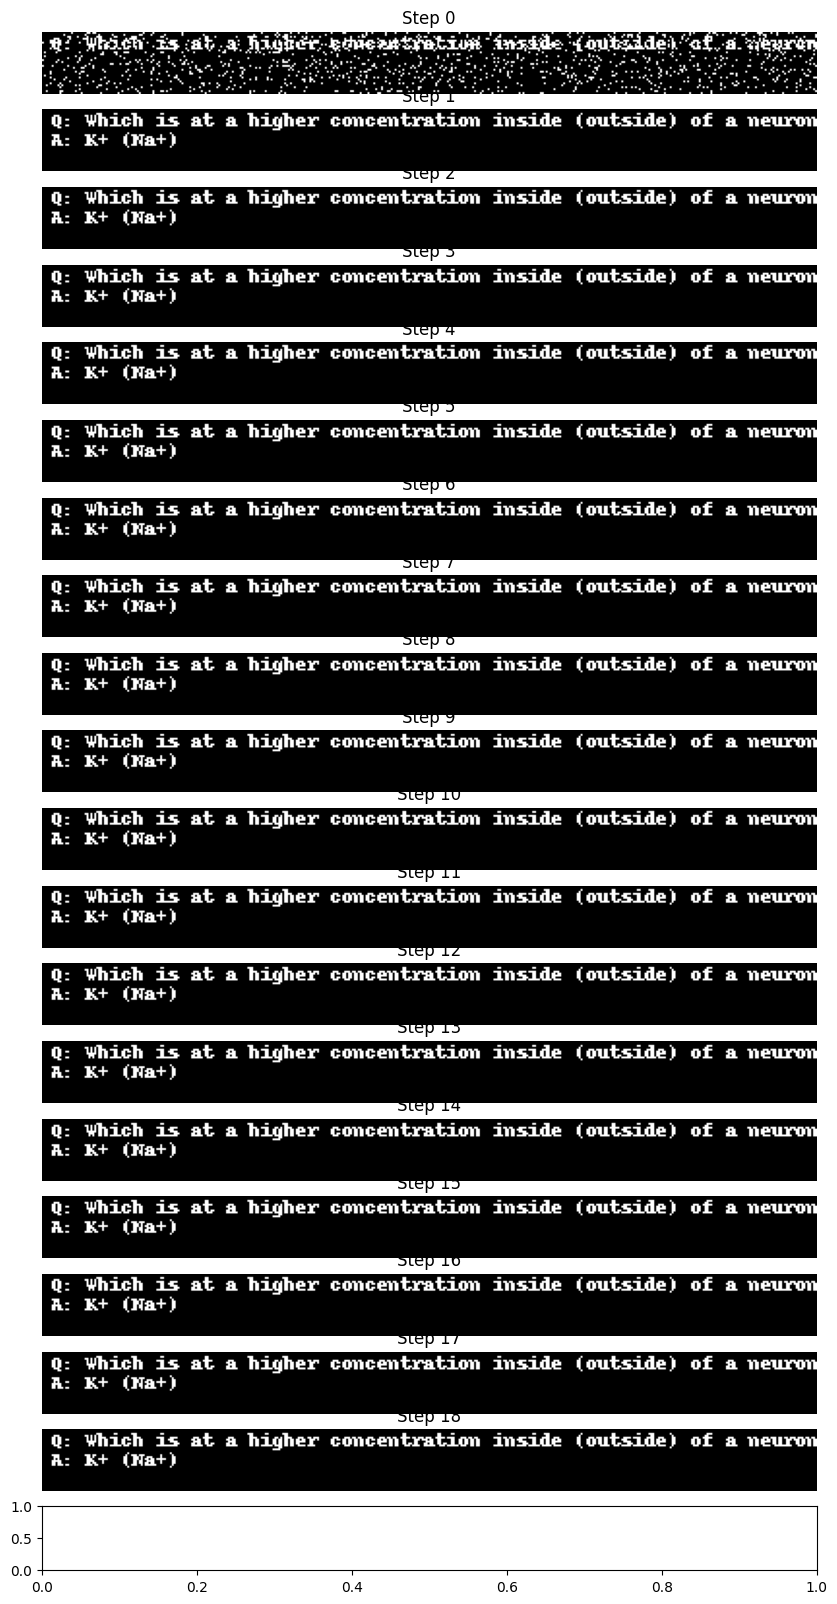

In [82]:
# Exploring network response to corrupted inputs
question_num = 1  # Example question number
corruption_probability = 0.1

# Generate a corrupted version of the question
xi0 = string2im(f"Q: {questions[question_num]}", " ", Nx, Ny)
corrupted_bits = np.random.rand(Ny*Nx) < corruption_probability
xi_corrupted = np.where(corrupted_bits, 1 - xi0, xi0).flatten()

# Run the network with corrupted input
h_corrupted = np.zeros((N, 20))
h_corrupted[:, 0] = xi_corrupted

plt.subplots(20, 1, figsize=(10, 20))
for t in range(0, 20):
    h_corrupted[:, t+1] = hopfield_net.update(h_corrupted[:, t])
    plt.subplot(20, 1, t+1)
    plot_mem(h_corrupted[:, t], Nx, Ny)
    plt.title(f"Step {t}")

plt.show()

What do the hopfield weights converge to? Can you write a one-step update rule for the weight matrix, given a set of memories?

In [113]:
w_ideal = xi @ xi.T
np.all(w_ideal == hopfield_net.weights)

False

In [247]:
# Define the Hopfield Network class
class ContinuousHopfieldNetwork:
    def __init__(self, size, activation_function=None):
        self.size = size
        self.eta = 0.1
        self.weights = np.zeros((size, size), dtype=np.double)
        
        if activation_function is None:
            self.activation_function = self.sigmoid
        else:
            self.activation_function = activation_function

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def train(self, patterns):
        for pattern in patterns:
            print(np.outer(pattern, pattern))
            self.weights += np.outer(pattern, pattern)

    def update(self, pattern):
        print(pattern)
        act = self.weights @ pattern
        # act = self.activation_function(hid)
        return (1 - self.eta) * pattern + self.eta * (pattern - act)

In [248]:
np.outer(xi[:,0], xi[:,0])

array([[1., 0.],
       [0., 0.]])

[[1. 0.]
 [0. 0.]]
[[0. 0.]
 [0. 1.]]


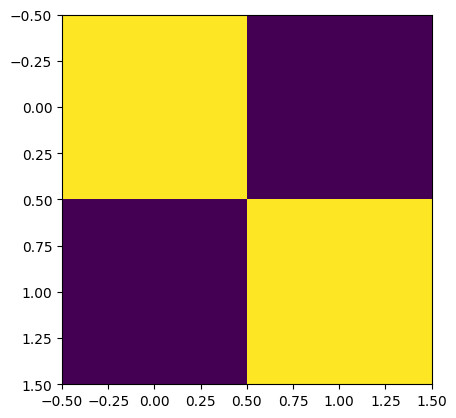

In [249]:
hopfield_net = ContinuousHopfieldNetwork(2)

xi = np.array([[1.0, 0],[0, 1.0]], dtype=np.double)
hopfield_net.train(xi)

plt.imshow(hopfield_net.weights)

In [250]:
init = np.array([0, 0.1])

T = 10
h = np.zeros((2, T))
h[:, 0] = init
for t in range(T-1):
    h[:, t+1] = hopfield_net.update(h[:, t])

[0.  0.1]
[0.   0.09]
[0.    0.081]
[0.     0.0729]
[0.      0.06561]
[0.       0.059049]
[0.        0.0531441]
[0.         0.04782969]
[0.         0.04304672]


In [199]:
print(h)

[[ 0.  -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1 -0.1]
 [ 0.2  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]]


In [ ]:
import torch
# Define the Hopfield Network class
class ContinuousHopfieldNetwork:
    def __init__(self, size, activation_function=None):
        self.size = size
        self.eta = 0.1
        self.weights = np.zeros((size, size), dtype=np.double)
        
        if activation_function is None:
            self.activation_function = self.sigmoid
        else:
            self.activation_function = activation_function

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def train(self, patterns):
        for pattern in patterns:
            print(np.outer(pattern, pattern))
            self.weights += np.outer(pattern, pattern)

    def update(self, pattern):
        print(pattern)
        act = torch.nn.softmax(self.weights @ pattern)
        # act = self.weights @ pattern
        # act = self.activation_function(hid)
        return act

array([[1., 0.],
       [0., 1.]])

In [255]:
import torch
ps = torch.tensor([[1.0, 0],[0, 1.0]])

M = torch.zeros(2, 2)
for p in ps:
    M += torch.outer(p, p)

# mems are columns; M = x @ x.T
softmax(ps * xi[:, 0], dim=

tensor([[1., 0.],
        [0., 0.]], dtype=torch.float64)